## Project Introduction

Present project takes subscribers data in 2024 and aims to answer general questions based on exploration of said data.

1. Top Performers:

2. Trends by Category

3. Geographical Insights

4. Comparison of Brands

5. Language Trends

6. Category vs. Subscriber Count

7. Segmentation


#Take into account
- Some of the variables are repeated (Eg. United Stated / Ukraine, how to deal with these?) 

In [1]:
#database
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-subscribers-data-2024/youtube_subscribers_data.csv


In [2]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db = pd.read_csv("/kaggle/input/youtube-subscribers-data-2024/youtube_subscribers_data.csv")
db.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,335.0,English,Entertainment,United States
1,T-Series,Yes,280.0,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,186.0,English,Education,United States
3,SET India,Yes,180.0,Hindi,Entertainment,India
4,Vlad and Niki,No,129.0,English,Entertainment,Russia


In [4]:
db.head(10)

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,335.0,English,Entertainment,United States
1,T-Series,Yes,280.0,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,186.0,English,Education,United States
3,SET India,Yes,180.0,Hindi,Entertainment,India
4,Vlad and Niki,No,129.0,English,Entertainment,Russia
5,Kids Diana Show,Yes,128.0,English,Entertainment,United States Ukraine
6,Like Nastya,No,123.0,English,Entertainment,United States Ukraine
7,Zee Music,Yes,112.0,Hindi,Music,India
8,PewDiePie,No,110.0,English,Entertainment,Sweden Japan
9,WWE,Yes,105.0,English,Sports,United States


## 1. Top Performers
Which channels have the most subscribers in 2024?

In [5]:
db = db.sort_values(by="Subscribers (millions)",ascending=False)
print(db.head(5))

                         Name Brand channel  Subscribers (millions)  \
0                     MrBeast            No                   335.0   
1                    T-Series           Yes                   280.0   
2  Cocomelon - Nursery Rhymes           Yes                   186.0   
3                   SET India           Yes                   180.0   
4               Vlad and Niki            No                   129.0   

  Primary language       Category        Country  
0          English  Entertainment  United States  
1            Hindi          Music          India  
2          English      Education  United States  
3            Hindi  Entertainment          India  
4          English  Entertainment         Russia  


What is the average subscriber count across all channels?

In [6]:
print(db["Subscribers (millions)"].mean())

90.962


## 2. Trends by Category
What are the most popular content categories based on subscriber counts?
Is there a significant difference in subscriber counts between categories?

In [7]:
categ_anal = db.groupby("Category").agg({
    'Subscribers (millions)': 'mean'})
print(categ_anal.sort_values("Subscribers (millions)",ascending= False))
#print(categ_anal)

                         Subscribers (millions)
Category                                       
Education                            106.500000
Sports                               105.000000
Entertainment                        101.260000
Music                                 83.770588
Film                                  81.900000
How-to                                81.100000
Entertainment/Sports                  71.300000
News                                  68.600000
Lifestyle Vlogs                       62.200000
Comedy                                60.600000
Education/Entertainment               60.200000


## 3.Geographical Insights
Which countries have the highest representation in terms of total subscribers?

In [8]:
geo_db = db.groupby("Country").agg({
    "Subscribers (millions)":"sum"})
geo_db = geo_db.sort_values(by="Subscribers (millions)",ascending=False)
geo_db

,Subscribers (millions)
Country,
India,1628.3
United States,1285.4
South Korea,402.0
United States Ukraine,251.0
Russia,129.0
Pakistan,122.4
Sweden Japan,110.0
Cyprus[a],81.1
Canada,74.4


Are there regional trends in terms of popular categories or primary languages?

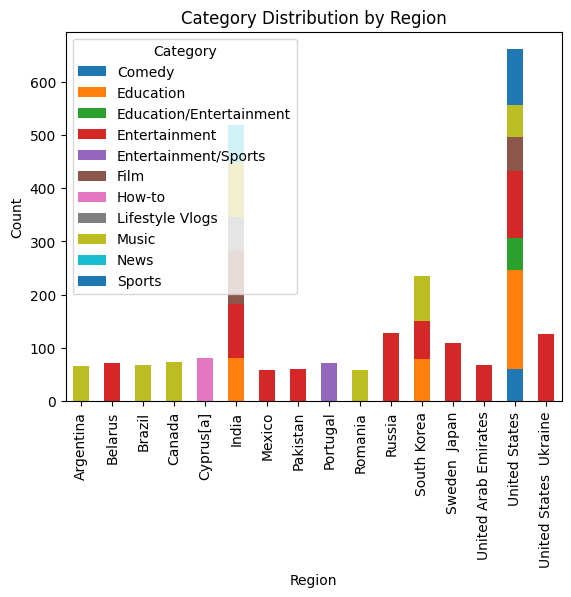

In [9]:
# Trends among countries
db_pt = db.pivot_table(index='Country', columns='Category', values='Subscribers (millions)')
# Plot stacked bar graph
db_pt.plot(kind='bar', stacked=True)
plt.title("Category Distribution by Region")
plt.ylabel("Count")
plt.xlabel("Region")
plt.legend(title="Category")
plt.show()

## 4. Comparison of Brands
Do branded channels have more subscribers on average than non-branded channels?

In [10]:
branded_sub = db.groupby("Brand channel").agg({
    "Subscribers (millions)":("mean","count")
})
branded_sub

Subscribers (millions)      
                                mean count
Brand channel                             
No                         89.995238    21
Yes                        91.662069    29

Which brand channels dominate specific categories (e.g., entertainment, education)?

In [11]:
cat_group = db.groupby(['Category', 'Name'])['Subscribers (millions)'].sum().reset_index()

'''# Find the brand channel with the highest views in each category
dominant_brands = cat_group.loc[cat_group.groupby('Category')['Subscribers (millions)'].idxmax()]

print(dominant_brands)'''
print(cat_group)

                   Category                                   Name  \
0                    Comedy                           Dude Perfect   
1                 Education  ChuChu TV Nursery Rhymes & Kids Songs   
2                 Education             Cocomelon - Nursery Rhymes   
3                 Education                      Infobells - Hindi   
4                 Education                               Pinkfong   
5   Education/Entertainment                             Mark Rober   
6             Entertainment                                     A4   
7             Entertainment                         ARY Digital HD   
8             Entertainment                       Alan Chikin Chow   
9             Entertainment                    BillionSurpriseToys   
10            Entertainment                              Colors TV   
11            Entertainment                          Fede Vigevani   
12            Entertainment                            HAR PAL GEO   
13            Entert

## 5. Language Trends
Which primary languages dominate the YouTube space in 2024? How does subscriber count differ between English-speaking and non-English-speaking channels?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


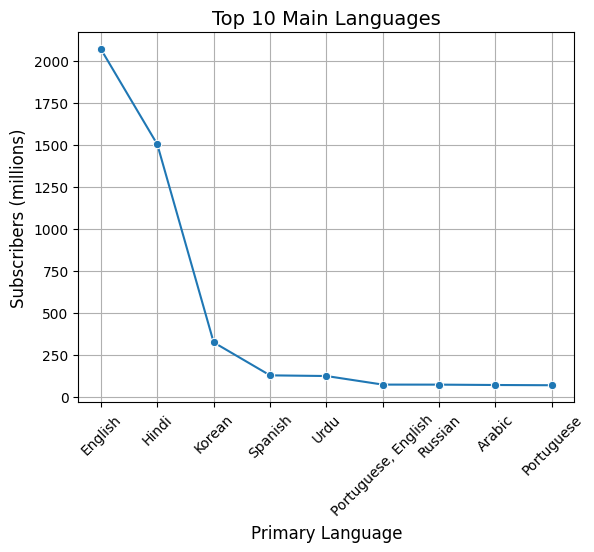

In [12]:
main_lan = db.groupby("Primary language")["Subscribers (millions)"].sum().sort_values(ascending=False)
main_lan = main_lan.reset_index()
main_lan = main_lan[:9]

#graph
sns.lineplot(data=main_lan, x="Primary language", y="Subscribers (millions)", marker='o')
plt.title("Top 10 Main Languages", fontsize=14)
plt.xlabel("Primary Language", fontsize=12)
plt.ylabel("Subscribers (millions)", fontsize=12)
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

## 6. Category vs. Subscriber Count:

Do certain categories (e.g., gaming, beauty, education) attract more subscribers than others?


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Film'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'How-to'),
  Text(6, 0, 'Entertainment/Sports'),
  Text(7, 0, 'News'),
  Text(8, 0, 'Lifestyle Vlogs'),
  Text(9, 0, 'Comedy'),
  Text(10, 0, 'Education/Entertainment')])

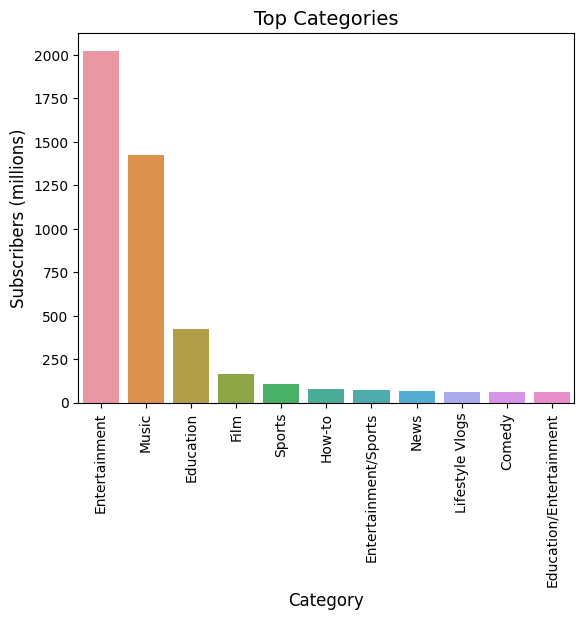

In [13]:
cat_df = db.groupby("Category")["Subscribers (millions)"].sum().reset_index().sort_values(by="Subscribers (millions)", ascending=False)
sns.barplot(data=cat_df, x="Category", y="Subscribers (millions)")
plt.title("Top Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Subscribers (millions)", fontsize=12)
plt.xticks(rotation=90) 

In [14]:
Are there categories where branded channels dominate over individual creators?

Object `creators` not found.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Film'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'How-to'),
  Text(6, 0, 'Entertainment/Sports'),
  Text(7, 0, 'News'),
  Text(8, 0, 'Lifestyle Vlogs'),
  Text(9, 0, 'Comedy'),
  Text(10, 0, 'Education/Entertainment')])

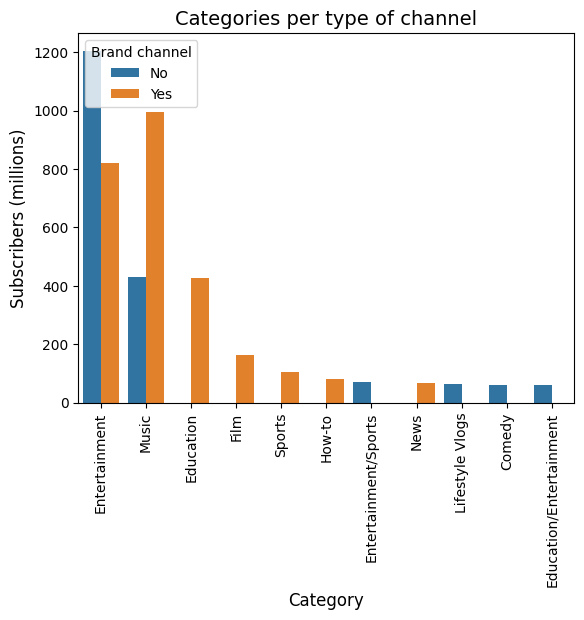

In [15]:
comp_brand = db.groupby(["Category","Brand channel"])["Subscribers (millions)"].sum().reset_index().sort_values(by="Subscribers (millions)", ascending=False)

sns.barplot(data=comp_brand, x="Category", y="Subscribers (millions)",hue='Brand channel')
plt.title("Categories per type of channel", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Subscribers (millions)", fontsize=12)
plt.xticks(rotation=90) 

## 7. Segmentation

Can we group channels into segments based on subscriber count, language, and category?


In [16]:
# Select the relevant columns first
data_encoded = db[["Name", "Subscribers (millions)", "Primary language", "Category", "Country"]]

# One-hot encode only the categorical columns and keep numeric columns intact
data_encoded = pd.get_dummies(data_encoded, columns=['Primary language', 'Category', "Country"], drop_first=True)

In [17]:
# Now, scale the 'Subscribers (millions)' column separately
from sklearn.preprocessing import StandardScaler

# Scale the 'Subscribers (millions)' column
scaler = StandardScaler()
data_encoded['Subscribers (millions)'] = scaler.fit_transform(data_encoded[['Subscribers (millions)']])

# Apply KMeans clustering to the data
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Choose n_clusters based on your analysis
data_encoded['cluster'] = kmeans.fit_predict(data_encoded.drop(columns=["Name"]))  # Don't include 'Name' in clustering

# Show the resulting segments
print(data_encoded[['Name', 'cluster']])

                                     Name  cluster
0                                 MrBeast        0
1                                T-Series        0
2              Cocomelon - Nursery Rhymes        0
3                               SET India        0
4                           Vlad and Niki        2
5                         Kids Diana Show        2
6                             Like Nastya        2
7                               Zee Music        1
8                               PewDiePie        2
9                                     WWE        2
10                              Goldmines        1
11                           Stokes Twins        2
12                               Sony SAB        1
13                              Blackpink        1
14  ChuChu TV Nursery Rhymes & Kids Songs        1
15                                 Zee TV        1
16                        5-Minute Crafts        2
17                              BANGTANTV        1
18                             

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


What insights can we gain from clusters of high-subscriber vs. low-subscriber channels?